In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir(("/content/drive/MyDrive/GLAUCOMA-DETECTION-master")))

['MAJOR PROJECT-1.pptx', 'README.md', 'Try&learn1.ipynb', 'KNN', 'Random_Forest', 'SVM', 'dataset', 'M-NET', 'AdaBoost', 'U-NET', 'diabetic_retinopathy', 'healthy', 'glaucoma', 'New folder', 'Gmodel.keras', 'GlaucomaTest.ipynb']


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Initialising the CNN
classifier = Sequential()

# Explicit Input layer
classifier.add(Input(shape=(256, 256, 3)))

# Convolution + Pooling Layer 1
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution + Pooling Layer 2
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
classifier.add(Flatten())

# Fully Connected Layers
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))  # Helps reduce overfitting
classifier.add(Dense(units=1, activation='sigmoid'))  # Binary output

# Compile
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/GLAUCOMA-DETECTION-master/dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/GLAUCOMA-DETECTION-master/dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for evaluation & heatmap
)

batch_size = 32


Found 478 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
# Model Training
model_info = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set) // batch_size,
    epochs=30,
    validation_data=test_set,
    validation_steps=len(test_set) // batch_size
)

# Evaluation
score = classifier.evaluate(test_set, steps=len(test_set) // batch_size)
print("Total test images:", len(test_set.filenames))
print("Loss:", score[0], "Test Accuracy:", score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 112s 7s/step - accuracy: 0.4681 - loss: 2.7638 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.5785 - loss: 0.6804 - val_accuracy: 0.5312 - val_loss: 0.6874
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.6197 - loss: 0.6316 - val_accuracy: 0.6719 - val_loss: 0.6420
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7383 - loss: 0.5666 - val_accuracy: 0.6719 - val_loss: 0.5780
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.7810 - loss: 0.4955 - val_accuracy: 0.7031 - val_loss: 0.5530
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.7543 - loss: 0.4814 - val_accuracy: 0.7500 - val_loss: 0.5252
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7882 - loss: 0.4905 - val_accuracy: 0.7969 - val_loss: 0.5107
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.8209 - loss: 0.4314 - val_accuracy: 0.7656 - val_loss

In [ ]:
# Evaluate model on the test set
score_test = classifier.evaluate(test_set, steps=len(test_set) // batch_size)
print("Total test images:", len(test_set.filenames))
print("Test Loss:", score_test[0], "Test Accuracy:", score_test[1])

# Evaluate model on the training set (if needed for comparison)
score_train = classifier.evaluate(training_set, steps=len(training_set) // batch_size)
print("Total training images:", len(training_set.filenames))
print("Training Loss:", score_train[0], "Training Accuracy:", score_train[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9167 - loss: 0.2074
Total test images: 64
Test Loss: 0.20828261971473694 Test Accuracy: 0.90625
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 666ms/step - accuracy: 0.9201 - loss: 0.2243
Total training images: 475
Training Loss: 0.22067855298519135 Training Accuracy: 0.917894721031189


In [ ]:
classifier.save('/content/drive/MyDrive/GLAUCOMA-DETECTION-master/Gmodel.keras')

In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
from keras.models import load_model

target_size = (256, 256)
model = load_model('/content/drive/MyDrive/GLAUCOMA-DETECTION-master/Gmodel.keras')
print("Model loaded")


Model loaded


In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/GLAUCOMA-DETECTION-master/dataset/train/class0/Im004.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    print("Glaucoma")
else:
    print("Not Glaucoma")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Not Glaucoma


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/GLAUCOMA-DETECTION-master/dataset/train/class1/Im265.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Not Glaucoma


In [ ]:
print(model_info.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Get available keys
    accuracy_key = 'accuracy' if 'accuracy' in model_history.history else 'acc'
    val_accuracy_key = 'val_accuracy' if 'val_accuracy' in model_history.history else 'val_acc'
    loss_key = 'loss'
    val_loss_key = 'val_loss'

    # Plot accuracy
    axs[0].plot(range(1, len(model_history.history[accuracy_key]) + 1), model_history.history[accuracy_key], label='Train Accuracy', color='blue', linestyle='-', marker='o')
    axs[0].plot(range(1, len(model_history.history[val_accuracy_key]) + 1), model_history.history[val_accuracy_key], label='Validation Accuracy', color='orange', linestyle='--', marker='x')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[accuracy_key]) + 1, 5))  # Show ticks every 5 epochs
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[0].legend(loc='best')

    # Plot loss
    axs[1].plot(range(1, len(model_history.history[loss_key]) + 1), model_history.history[loss_key], label='Train Loss', color='blue', linestyle='-', marker='o')
    axs[1].plot(range(1, len(model_history.history[val_loss_key]) + 1), model_history.history[val_loss_key], label='Validation Loss', color='orange', linestyle='--', marker='x')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history[loss_key]) + 1, 5))  # Show ticks every 5 epochs
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[1].legend(loc='best')

    # Display the plot
    plt.tight_layout()
    plt.show()


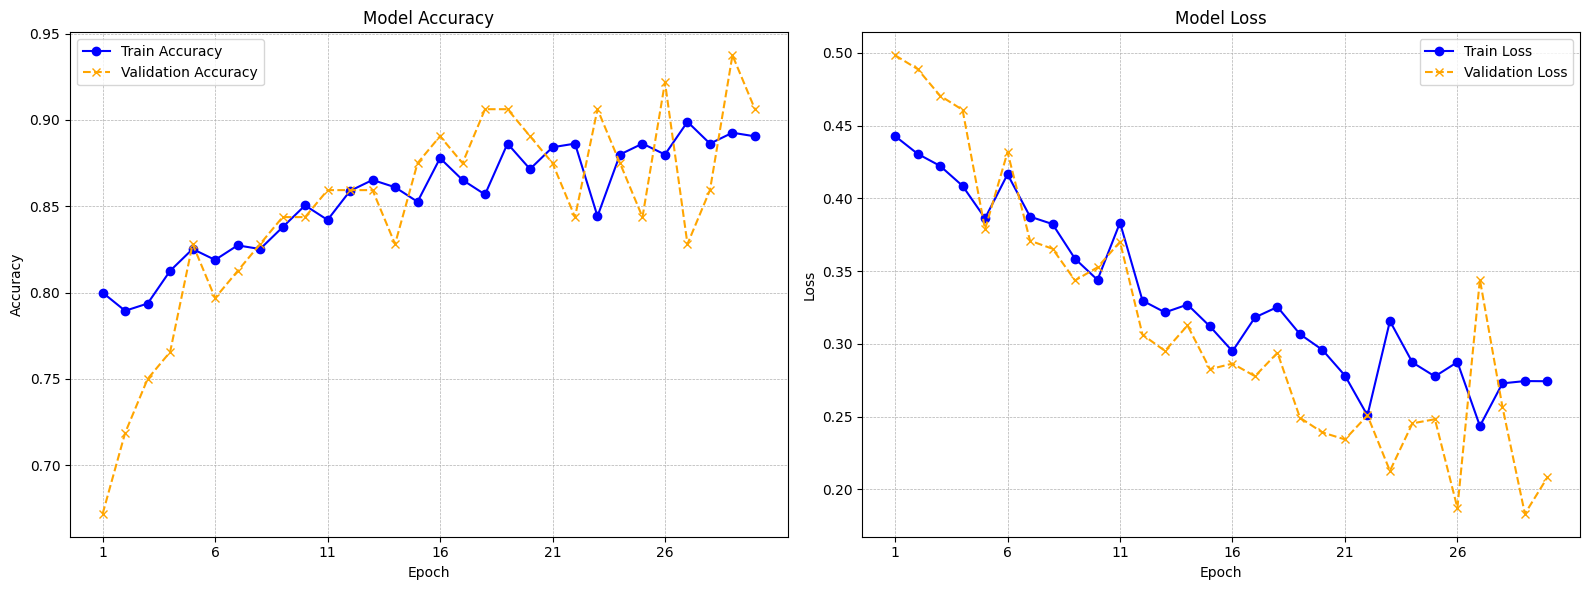

In [ ]:
plot_model_history(model_info)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


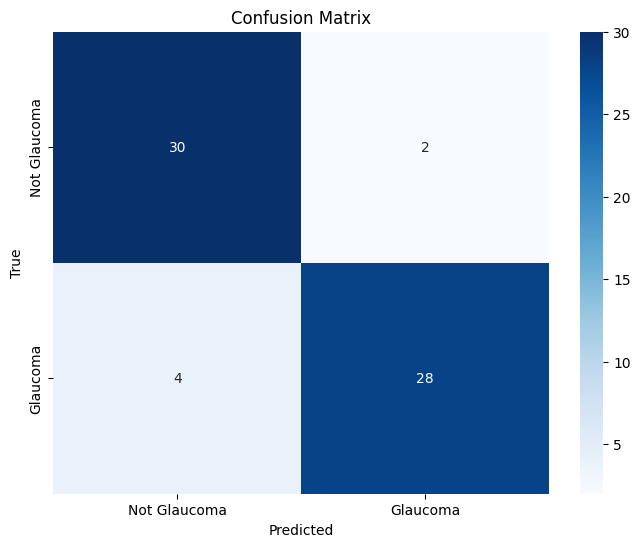

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set (you can use test_set for this)
test_labels = test_set.classes  # The true labels from the test set
test_preds = classifier.predict(test_set, steps=len(test_set))

# Get the predicted class labels
predicted_labels = (test_preds > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Glaucoma', 'Glaucoma'], yticklabels=['Not Glaucoma', 'Glaucoma'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels, target_names=['Not Glaucoma', 'Glaucoma']))


              precision    recall  f1-score   support

Not Glaucoma       0.88      0.94      0.91        32
    Glaucoma       0.93      0.88      0.90        32

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.91        64



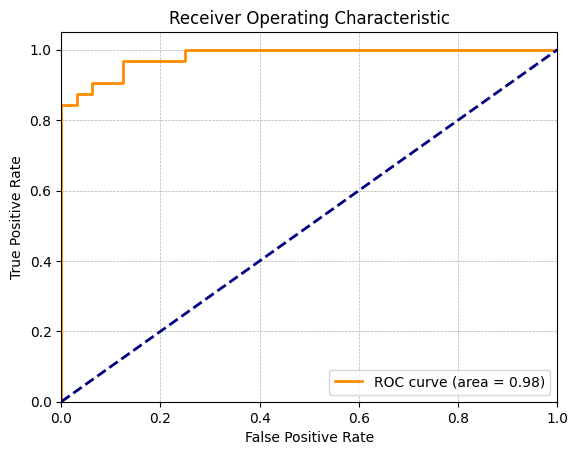

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(test_labels, test_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


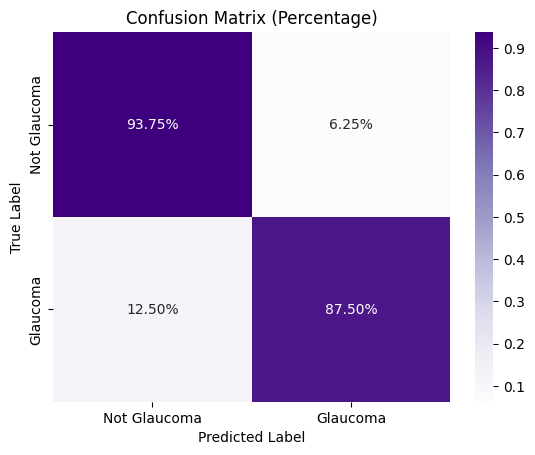

In [ ]:
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Purples',
            xticklabels=['Not Glaucoma', 'Glaucoma'],
            yticklabels=['Not Glaucoma', 'Glaucoma'])
plt.title('Confusion Matrix (Percentage)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/GLAUCOMA-DETECTION-master/Gmodel.keras')  # Replace with your model path

def predict_glaucoma(image_path):
    """Predicts glaucoma from an image and displays results visually."""
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    confidence = prediction if prediction > 0.5 else 1 - prediction
    result = "Glaucoma " if prediction > 0.5 else "No Glaucoma "

    plt.imshow(img)
    plt.title(f"{result}\nConfidence: {confidence*100:.2f}%", color='red' if prediction > 0.5 else 'green')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


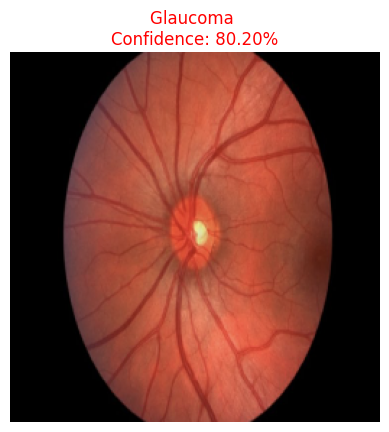

In [ ]:
# Example usage
test_image_path = '/content/Screenshot 2025-04-23 at 12.49.48 AM.png'  # Replace with your image
predict_glaucoma(test_image_path)